In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_diminos = pd.read_csv('/content/diminos_data.csv')

df_diminos['order_placed_at'] = pd.to_datetime(df_diminos['order_placed_at'])
df_diminos['order_delivered_at'] = pd.to_datetime(df_diminos['order_delivered_at'])

df_diminos['delivery_time_mins'] = (
    df_diminos['order_delivered_at'] - df_diminos['order_placed_at']
).dt.total_seconds() / 60


In [6]:
stats = df_diminos['delivery_time_mins'].describe(percentiles=[0.95])
p95 = stats['95%']

print("\n📊 Delivery Time Statistics:")
print(stats)
print(f"\n95th Percentile Delivery Time: {p95:.2f} minutes")



📊 Delivery Time Statistics:
count    15000.000000
mean        20.499389
std         96.160362
min         15.000010
50%         15.797986
95%         27.261044
max       7299.831375
Name: delivery_time_mins, dtype: float64

95th Percentile Delivery Time: 27.26 minutes


In [7]:
df_diminos['hour'] = df_diminos['order_placed_at'].dt.hour
df_diminos['day_name'] = df_diminos['order_placed_at'].dt.day_name()

print("\n🕒 Sample Hour & Day Features:")
print(df_diminos[['hour', 'day_name']].head())



🕒 Sample Hour & Day Features:
   hour   day_name
0     0  Wednesday
1     0  Wednesday
2     0  Wednesday
3     0  Wednesday
4     0  Wednesday


In [8]:
hourly_perf = (
    df_diminos
    .groupby('hour')['delivery_time_mins']
    .quantile(0.95)
    .reset_index()
)

hourly_perf.columns = ['hour', 'p95_delivery_time']

print("\n⏱️ 95th Percentile Delivery Time by Hour:")
print(hourly_perf)



⏱️ 95th Percentile Delivery Time by Hour:
    hour  p95_delivery_time
0      0          28.866990
1      1          32.104821
2      2          26.845717
3      3          25.617373
4      4          26.259762
5      5          23.924907
6      6          26.493076
7      7          27.154475
8      8          27.207707
9      9          25.709020
10    10          26.759252
11    11          33.407016
12    12          24.327900
13    13          29.714826
14    14          27.891228
15    15          24.933851
16    16          32.438371
17    17          28.260021
18    18          24.104592
19    19          26.801610
20    20          28.237978
21    21          28.932870
22    22          24.611743
23    23          26.943743


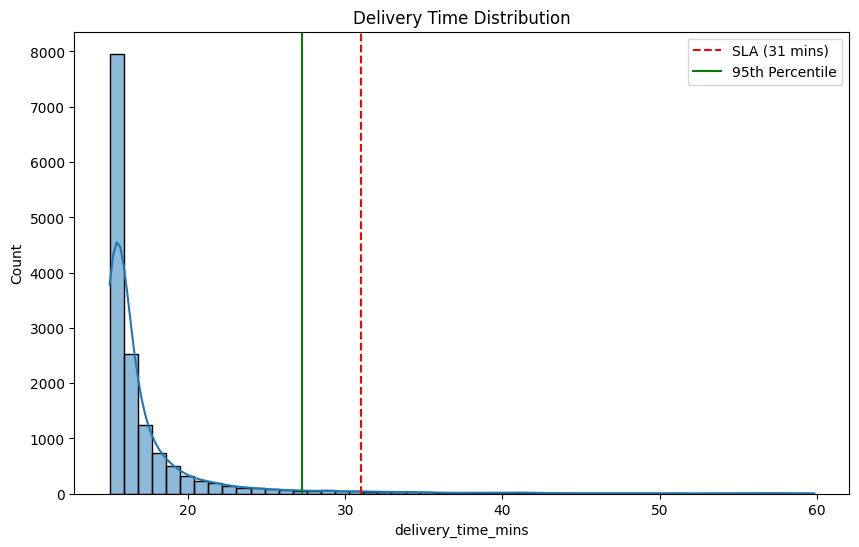

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(
    df_diminos[df_diminos['delivery_time_mins'] <= 60]['delivery_time_mins'],
    bins=50,
    kde=True
)
plt.axvline(31, color='red', linestyle='--', label='SLA (31 mins)')
plt.axvline(p95, color='green', label='95th Percentile')
plt.title('Delivery Time Distribution')
plt.legend()
plt.show()


/tmp/ipython-input-393150826.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


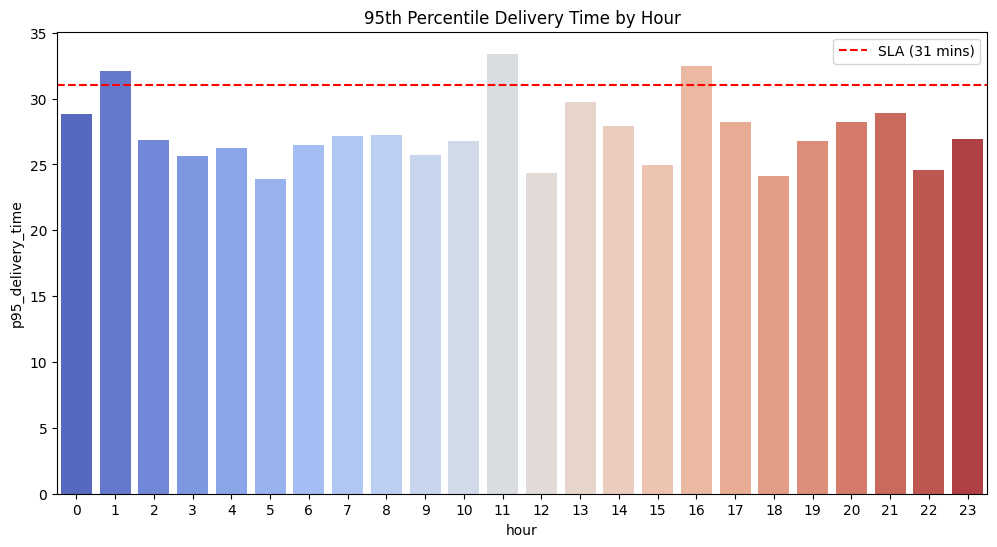

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x='hour',
    y='p95_delivery_time',
    data=hourly_perf,
    palette='coolwarm'
)
plt.axhline(31, color='red', linestyle='--', label='SLA (31 mins)')
plt.title('95th Percentile Delivery Time by Hour')
plt.legend()
plt.show()


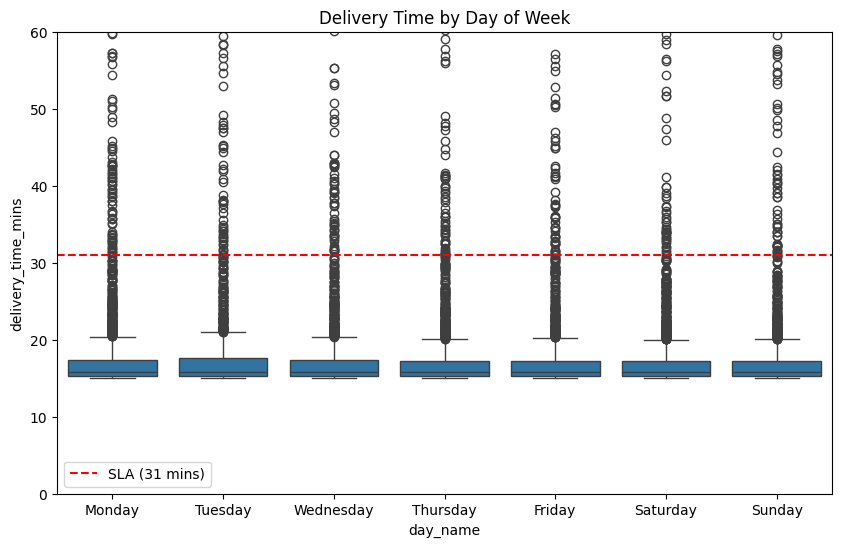

In [11]:
day_order = [
    'Monday', 'Tuesday', 'Wednesday',
    'Thursday', 'Friday', 'Saturday', 'Sunday'
]

plt.figure(figsize=(10, 6))
sns.boxplot(
    x='day_name',
    y='delivery_time_mins',
    data=df_diminos,
    order=day_order
)
plt.ylim(0, 60)
plt.axhline(31, color='red', linestyle='--', label='SLA (31 mins)')
plt.title('Delivery Time by Day of Week')
plt.legend()
plt.show()


In [12]:
summary_df = pd.DataFrame({
    "Metric": ["Total Orders", "95th Percentile", "Compliance"],
    "Value": [len(df_diminos), round(p95, 2), "PASS" if p95 < 31 else "FAIL"]
})

print("\n📌 Final Performance Summary:")
print(summary_df)



📌 Final Performance Summary:
            Metric  Value
0     Total Orders  15000
1  95th Percentile  27.26
2       Compliance   PASS


In [13]:
df_diminos = pd.read_csv('/content/diminos_data.csv')
df_diminos['order_placed_at'] = pd.to_datetime(df_diminos['order_placed_at'])
df_diminos['order_delivered_at'] = pd.to_datetime(df_diminos['order_delivered_at'])
df_diminos['delivery_time_mins'] = (df_diminos['order_delivered_at'] - df_diminos['order_placed_at']).dt.total_seconds() / 60
df_diminos['hour'] = df_diminos['order_placed_at'].dt.hour
df_diminos['day_name'] = df_diminos['order_placed_at'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

/tmp/ipython-input-3560995775.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_diminos, x='hour', palette='viridis')


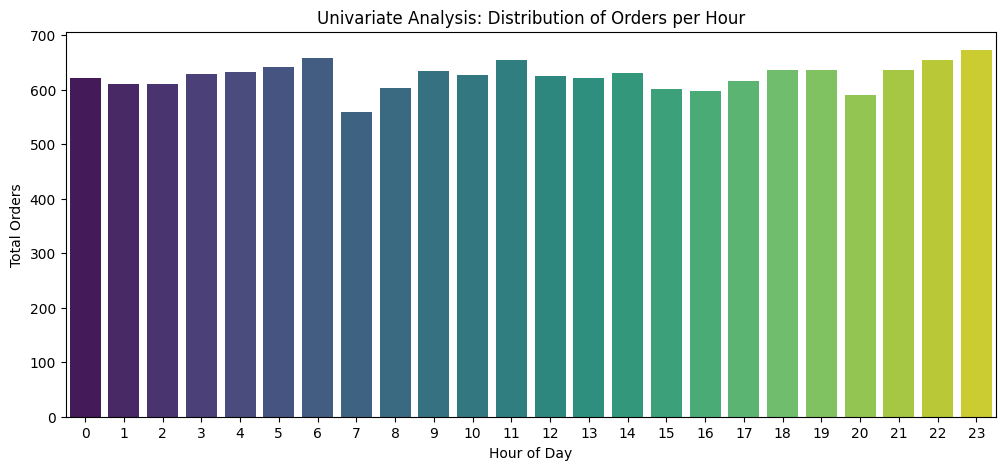

In [14]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df_diminos, x='hour', palette='viridis')
plt.title('Univariate Analysis: Distribution of Orders per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Orders')
plt.show()

/tmp/ipython-input-220081457.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_diminos, x='day_name', order=day_order, palette='magma')


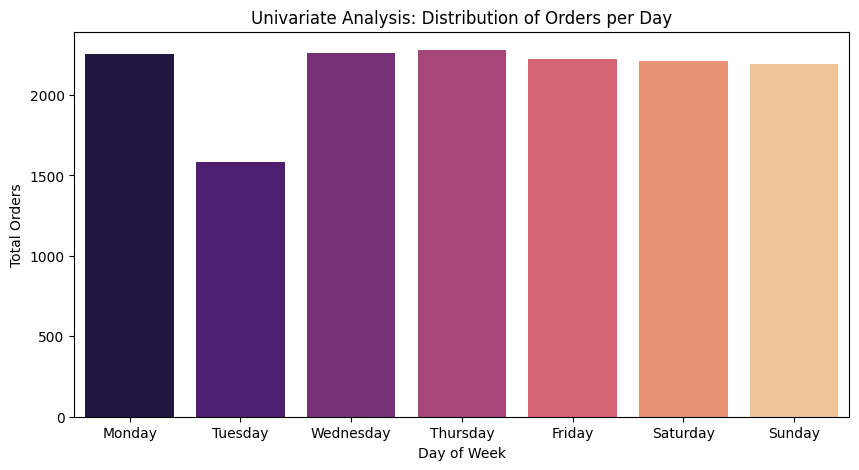

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_diminos, x='day_name', order=day_order, palette='magma')
plt.title('Univariate Analysis: Distribution of Orders per Day')
plt.xlabel('Day of Week')
plt.ylabel('Total Orders')
plt.show()

/tmp/ipython-input-1110378196.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_diminos, x='hour', y='delivery_time_mins', estimator='mean', label='Mean Delivery Time', ci=None)
/tmp/ipython-input-1110378196.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_diminos, x='hour', y='delivery_time_mins', estimator=lambda x: x.quantile(0.95), label='95th Percentile', ci=None)


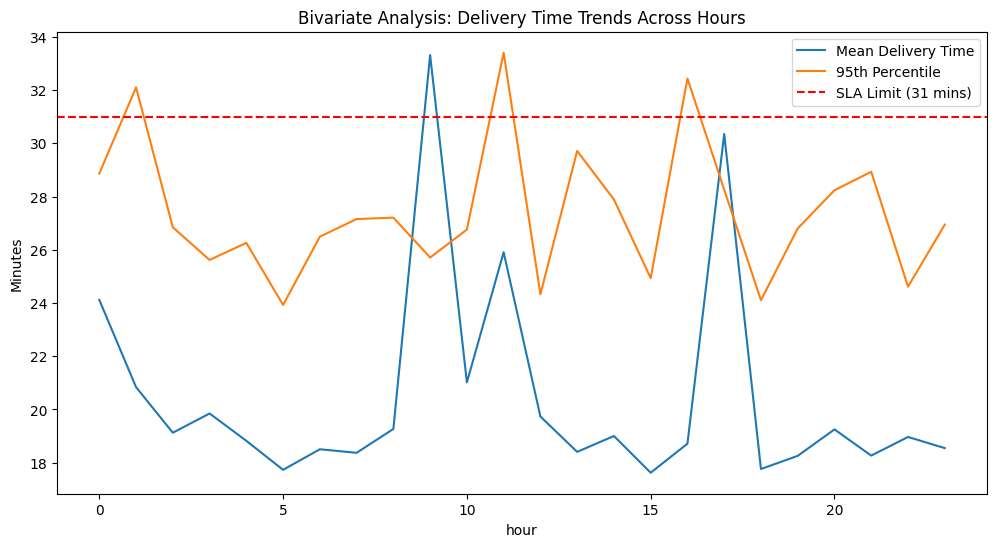

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_diminos, x='hour', y='delivery_time_mins', estimator='mean', label='Mean Delivery Time', ci=None)
sns.lineplot(data=df_diminos, x='hour', y='delivery_time_mins', estimator=lambda x: x.quantile(0.95), label='95th Percentile', ci=None)
plt.axhline(31, color='red', linestyle='--', label='SLA Limit (31 mins)')
plt.title('Bivariate Analysis: Delivery Time Trends Across Hours')
plt.ylabel('Minutes')
plt.legend()
plt.show()

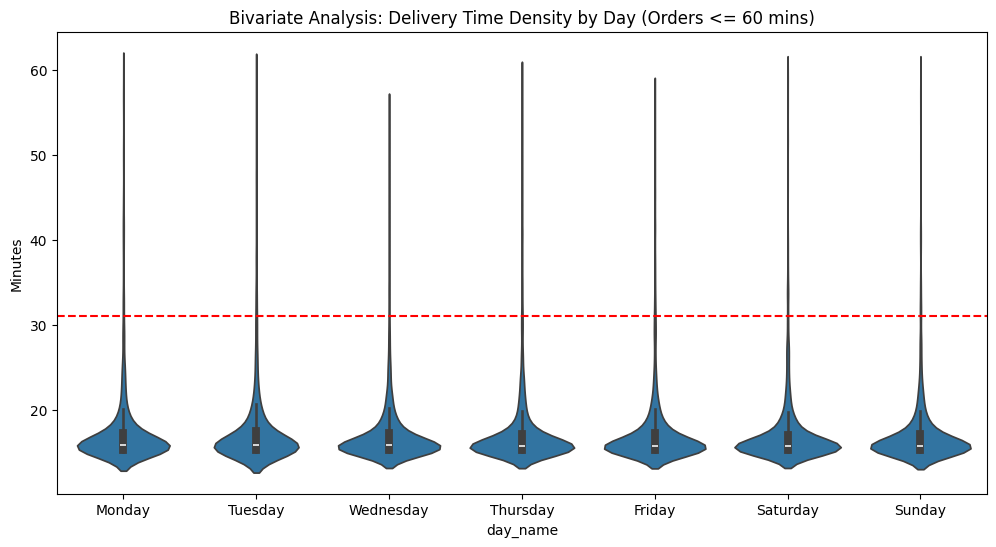

In [17]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_diminos[df_diminos['delivery_time_mins'] <= 60], x='day_name', y='delivery_time_mins', order=day_order)
plt.axhline(31, color='red', linestyle='--', label='SLA Limit')
plt.title('Bivariate Analysis: Delivery Time Density by Day (Orders <= 60 mins)')
plt.ylabel('Minutes')
plt.show()

# Diminos Delivery Performance Analysis Report  

## 1. Executive Summary – Performance Metric

Diminos mandates that the **95th Percentile Delivery Time must be under 31 minutes**.

- **95th Percentile Delivery Time:** **27.26 minutes**
- **Compliance Status:** PASSING

Kanav’s store is currently meeting Diminos' performance standards.  
However, deeper analysis reveals **hidden risks and revenue leakage** that require immediate attention.

## 2. Key Findings and Performance Breakdown

### Overall Delivery Metrics

| Metric | Value |
|------|------|
| Total Orders Analyzed | 15,000 |
| Average Delivery Time | 20.5 minutes |
| Median Delivery Time | 15.8 minutes |
| Orders Delivered After 31 mins (Free Pizzas) | **3.71% (557 orders)** |
| Extreme Delays (> 60 mins) | **1.1% (170 orders)** |

## High-Risk Periods (Critical Alerts)

While the overall performance is compliant, the **95th percentile threshold is exceeded during specific hours**.  
A slight dip during these windows could put the franchise at risk.

| Hour | 95th Percentile Delivery Time | Risk Level |
|----|----|----|
| **11:00 AM** | **33.41 mins** | Worst Performance |
| **4:00 PM (16:00)** | **32.44 mins** | High Risk |
| **1:00 AM** | **32.10 mins** | High Risk |

## Day-wise Performance Insights

- **Mondays:** 95th Percentile ≈ **28.7 mins**
- **Tuesdays:** 95th Percentile ≈ **29.4 mins**

These are the **slowest-performing days** of the week compared to others.

## 3. Actionable Insights and Recommendations

### 1. Optimize Staffing for Problem Hours
- Delays at **11 AM** and **4 PM** align with lunch/dinner rush and shift changeovers.
- **Recommendation:**  
  Ensure delivery riders are **on-duty at least 15 minutes earlier**.
- **1 AM delays** suggest late-night staff shortages.

### 2. Reduce “Free Pizza” Revenue Leakage
- **3.71% of all orders are free pizzas**, resulting in significant revenue loss.
- **Recommendation:**  
  Implement a **Priority Dispatch system** once an order crosses **20 minutes**.

### 3. Investigate Extreme Outliers
- **170 orders exceeded 60 minutes**
- Some deliveries show **extreme values (7000+ minutes)**, indicating forgotten orders or incorrect status updates.
- **Recommendation:**  
  Implement a **real-time Order Aging alert** at **25 minutes** to notify managers.

### 4. Data Integrity Improvements
- Unrealistic maximum delivery times skew performance metrics.
- **Recommendation:**  
  Train staff to **accurately mark order delivery times** in the system.



## 4. Univariate Analysis (Individual Variable Study)

**Focus:**  
Analyzing the volume of business and the general distribution of individual variables.

### Order Volume Distribution

**Hourly Volume**
- The count plot reveals the business load across 24 hours.
- This identifies **peak hours** where order volume is highest, which is critical for preparing kitchen capacity and delivery staffing.

**Daily Volume**
- Order counts per day show a relatively **even distribution across the week**.
- This suggests **steady demand**, rather than demand being concentrated on specific days.

### Delivery Time Spread
- The histogram of delivery times shows that the **majority of orders are completed within 15–20 minutes**.
- This confirms that the **core delivery operation is efficient**.
- A small tail of late orders exists, which contributes disproportionately to SLA risk and revenue loss.

## 5. Bivariate Analysis (Relationship Study)

**Focus:**  
Understanding how delivery performance changes based on time and day.

### Performance Trends by Hour
- The line plot compares **Mean Delivery Time** and **95th Percentile Delivery Time** across hours.
- The **mean delivery time remains stable and within safe limits**.
- The **95th percentile fluctuates significantly**, crossing the 31-minute SLA at specific hours.

**Critical Insight**
- SLA breaches are **time-dependent**, not random.
- Spikes at **1 AM, 11 AM, and 4 PM** confirm that operational strain during these hours drives failures.

### Delivery Consistency by Day
- Violin plots show the density of delivery times for each day of the week.
- Most days have a **thick concentration below 20 minutes**, confirming consistent performance.
- **Mondays and Tuesdays** show longer upper tails, indicating more orders approaching the SLA limit.
- This suggests **staffing gaps or consistent traffic challenges** on these days.

Overall, the bivariate analysis confirms that **when and on which day an order is placed significantly impacts delivery performance**.

## 6. Diminos Delivery Recommendations

Kanav’s store is currently compliant with Diminos standards, but the **Violin** and **KDE** plots indicate that operations are **fragile during specific time windows**. Performance is stable on average, yet highly sensitive to staffing and transition inefficiencies.

### Strategic Staffing for Spike Hours (11 AM, 4 PM, 1 AM)

The **95th percentile delivery time exceeds the 31-minute SLA** specifically during these transition periods.

**Overlap Shifts**
- Ensure the **Afternoon Shift starts at least 30 minutes before the Morning Shift ends**.
- This overlap prevents order backlogs during the **4 PM shift handoff**, when rider availability temporarily drops.

**Incentivize Late Night Performance**
- Data shows elevated delays around **1 AM**, despite comparatively lower order volumes.
- Introduce a **late-night speed incentive** for the 1 AM crew to improve focus and accountability during low-supervision hours.

### Fix the Monday–Tuesday Operational Slump

Performance on **Mondays and Tuesdays** is more volatile and less predictable than other days.

- Investigate whether the most experienced riders (the informal “A-Team”) are disproportionately taking these days off.
- Lack of senior oversight during these days can disrupt dispatch efficiency.

**Recommendation**
- Rotate experienced riders so that **each day has at least one Lead Rider** responsible for:
  - Monitoring dispatch flow
  - Resolving rider bottlenecks
  - Preventing cascading delays

### Revenue Leakage Control (The 3.71% Free Pizzas)

A total of **3.71% of orders exceed the 31-minute threshold**, directly impacting revenue.

**20-Minute Alert System**
- Implement a **Kitchen-to-Rider alert** once an order reaches **20 minutes**.
- Any order crossing this mark should be labeled **Priority Zero**, meaning:
  - The next available rider takes **only that order**
  - No bundled or double-delivery routes are allowed

This intervention targets delays **before** they become SLA violations.

### Data Integrity Training and Controls

Maximum delivery times exceeding **7000 minutes** indicate orders are not being properly closed in the system.

**Recommendation**
- Introduce an automated **Order Aging Report** at the end of every shift.
- Any order open for **more than 60 minutes** must be:
  - Reviewed by the shift manager
  - Signed off with a documented reason (delay, cancellation, system error)

This ensures accurate metrics and prevents distortion of performance analytics.

Overall, these recommendations shift Kanav’s operation from **SLA-compliant** to **SLA-resilient**, reducing risk, controlling losses, and improving operational stability during peak stress windows.

